# Линейные модели, SVM и деревья решений.

### 1. Работа с датасетом

In [ ]:
!wget https://archive.ics.uci.edu/static/public/850/raisin.zip

--2024-04-04 10:45:51--  https://archive.ics.uci.edu/static/public/850/raisin.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘raisin.zip’

raisin.zip              [ <=>                ] 111.99K  --.-KB/s    in 0.1s    

2024-04-04 10:45:51 (762 KB/s) - ‘raisin.zip’ saved [114677]



In [ ]:
!unzip raisin.zip
!unzip Raisin_Dataset.zip

Archive:  raisin.zip
  inflating: Raisin_Dataset.zip      
Archive:  Raisin_Dataset.zip
   creating: Raisin_Dataset/
  inflating: Raisin_Dataset/Raisin_Dataset.arff  
  inflating: Raisin_Dataset/Raisin_Dataset.txt  
  inflating: Raisin_Dataset/Raisin_Dataset.xlsx  


In [ ]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
raw_data = loadarff('Raisin_Dataset/Raisin_Dataset.arff')
df = pd.DataFrame(raw_data[0])

In [ ]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,b'Kecimen'
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,b'Kecimen'
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,b'Kecimen'
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,b'Kecimen'
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,b'Kecimen'


### 2.

In [ ]:
le = LabelEncoder()
df["Class"]= le.fit_transform(df["Class"])
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,1
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,1


### 3. Разделим выборку на обучающую и тестовую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Class",axis=1), df["Class"], test_size=0.33, random_state=42)

### 4. Обучим модели и оценим их качество

In [ ]:
# Logisitc Regression
clf_lin = LogisticRegression()
clf_lin.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# SVM
clf_svm = SVC()
clf_svm.fit(X_train,y_train)

SVC()

In [ ]:
# Tree
clf_tree = DecisionTreeClassifier(max_depth=4)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# Metrics
clfs = [clf_lin,clf_svm,clf_tree]
for clf in clfs:
    print(f"{type(clf).__name__}:")
    print('\t',f"accuracy = {accuracy_score(y_test,clf.predict(X_test))}")
    print('\t',f"f1 = {f1_score(y_test,clf.predict(X_test))}")

LogisticRegression:
	 accuracy = 0.8518518518518519
	 f1 = 0.8543046357615894
SVC:
	 accuracy = 0.8383838383838383
	 f1 = 0.8490566037735848
DecisionTreeClassifier:
	 accuracy = 0.8316498316498316
	 f1 = 0.8417721518987341


In [ ]:
clf_tree.feature_importances_

array([0.02705308, 0.80064648, 0.        , 0.04835557, 0.        ,
       0.04896623, 0.07497864])

In [ ]:
clf_tree.feature_names_in_

array(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter'], dtype=object)

### 5. График важности признаков в дереве решений

<Axes: >

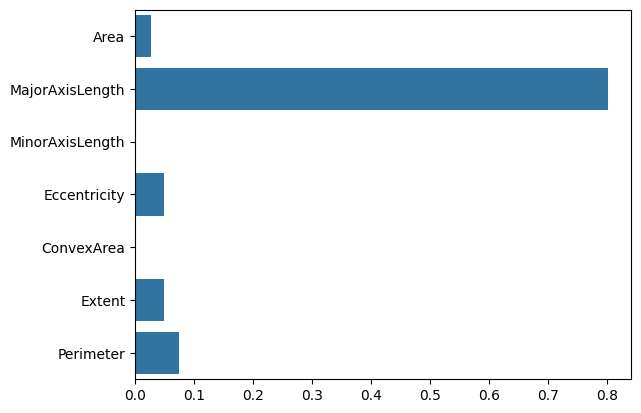

In [ ]:
sns.barplot(y=clf_tree.feature_names_in_,x=clf_tree.feature_importances_)

### 6. Визуализируем дерево решений

[Text(0.4583333333333333, 0.875, 'x[1] <= 422.423\ngini = 0.5\nsamples = 603\nvalue = [306, 297]'),
 Text(0.25, 0.625, 'x[3] <= 0.871\ngini = 0.289\nsamples = 337\nvalue = [59, 278]'),
 Text(0.16666666666666666, 0.375, 'x[6] <= 1124.339\ngini = 0.269\nsamples = 331\nvalue = [53, 278]'),
 Text(0.08333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.25, 0.125, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6666666666666666, 0.625, 'x[6] <= 1198.638\ngini = 0.133\nsamples = 266\nvalue = [247, 19]'),
 Text(0.5, 0.375, 'x[0] <= 83928.5\ngini = 0.418\nsamples = 47\nvalue = [33, 14]'),
 Text(0.4166666666666667, 0.125, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.125, '\n  (...)  \n'),
 Text(0.8333333333333334, 0.375, 'x[3] <= 0.921\ngini = 0.045\nsamples = 219\nvalue = [214, 5]'),
 Text(0.75, 0.125, '\n  (...)  \n'),
 Text(0.9166666666666666, 0.125, '\n  (...)  \n')]

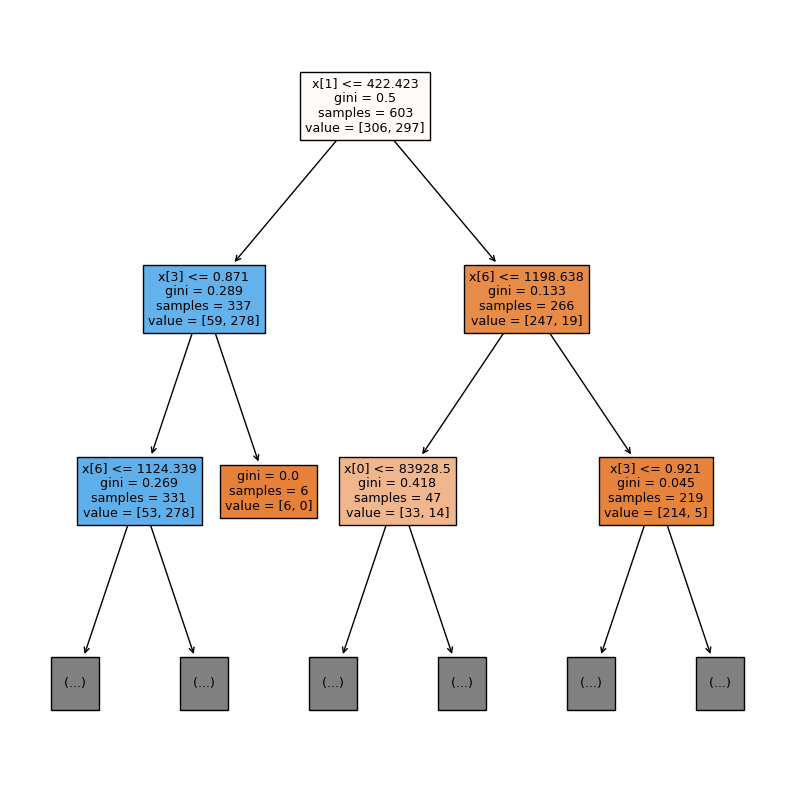

In [ ]:
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(clf_tree,max_depth=2,filled=True)

In [ ]:
clf_tree.predict([df.loc[3].drop('Class')])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.loc[3]

Area               45928.000000
MajorAxisLength      286.540559
MinorAxisLength      208.760042
Eccentricity           0.684989
ConvexArea         47336.000000
Extent                 0.699599
Perimeter            844.162000
Class                  1.000000
Name: 3, dtype: float64